数据整理

[[  1.   56.    2.  ...  56.  108.   91.2]
 [  1.   56.   17.  ...  56.  108.   91.1]
 [  1.   56.    3.  ...  56.  108.   91.1]
 ...
 [  1.   50.   45.  ...  50.  119.   58.1]
 [  3.    2.    1.  ...   2.  131.   63.4]
 [  3.    2.    2.  ...   2.  127.   63.4]]


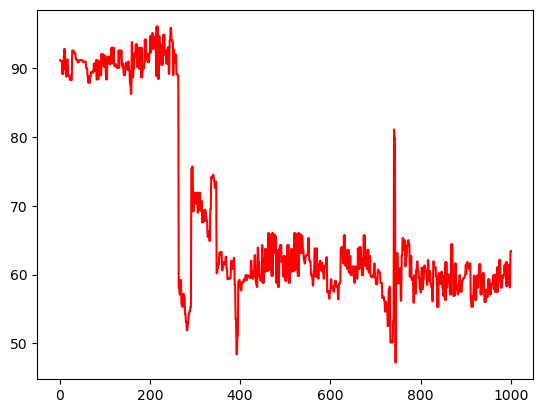

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a=np.array(pd.read_csv('./密炼数据集/密炼数据1测试集.csv').values)
for i in range(len(a)):
    if a[i,-1]==0:
        j=i-1
        a[i,-1] = a[j,-1]
print(a)
df = pd.DataFrame(a)
df.to_csv('./密炼数据集/密炼数据1测试集无异常.csv', index=False)
a=a[:,-1]
fig =plt.figure(1)
epohc = list(range(1,len(a)+1))
plt.plot(epohc,a,c='red')

11.545487688381533


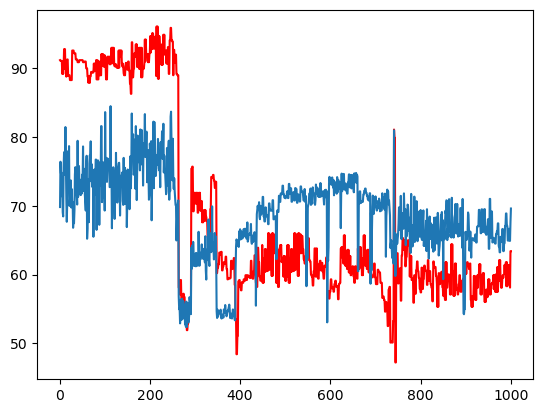

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
a=np.array(pd.read_csv('./密炼数据集/密炼数据1训练集无异常.csv').values)
pre= np.array(pd.read_csv('./密炼数据集/密炼数据1测试集无异常.csv').values)
""" pre1=pre[:,-1]
a=a[:,-1]
a = a.reshape(1000,1)
pre1 = pre1.reshape(1000,1) """
pls = PLSRegression(n_components=5)
pls.fit_transform(a[:,0:13],a[:,[13]])
y_test = pls.predict(pre[:,0:13])
""" scalar = StandardScaler()
b=scalar.fit_transform(a)
pre1 = scalar.inverse_transform(pre) """
fig =plt.figure(1)
epohc = list(range(1,len(y_test)+1))
rmse = mean_squared_error(y_test,pre[:,13],squared=False)
print(rmse)
plt.plot(epohc,pre[:,13],c='red')
plt.plot(epohc,y_test)
plt.show()